# Global Superstore Data Exploration

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar

pd.options.display.max_columns = None

## Read-In Data

In [2]:
def get_data(filepath, sheet_name):
    return pd.read_excel(filepath, sheet_name)

In [3]:
orders_df = get_data('./data/Global Superstore.xls', 'Orders')

In [4]:
returns_df = get_data('./data/Global Superstore.xls', 'Returns')

In [5]:
people_df = get_data('./data/Global Superstore.xls', 'People')

## Orders Data

In [6]:
orders_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


### Data Cleaning

#### Check for Missing Valuse

In [7]:
orders_df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [8]:
orders_df[orders_df['Country'] != 'United States'].isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

All of the missing postal codes are from countries located outside of the U.S.

#### Check Data Types

In [9]:
orders_df.dtypes

# Row ID - string
# Postal Code - String
orders_df['Row ID'] = orders_df['Row ID'].apply(str)
orders_df['Postal Code'] = orders_df['Postal Code'].apply(str)

orders_df.dtypes

Row ID                    object
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code               object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [30]:
orders_df['time_to_ship'] = ((orders_df['Ship Date'] - orders_df['Order Date']) / np.timedelta64(1, 'D')).astype(int)

### Question 1: How do different shipping modes differ in terms of time to ship and average shiping cost?

In [36]:
orders_df.groupby('Ship Mode')[['Shipping Cost', 'time_to_ship']].mean().sort_values('time_to_ship')

,Shipping Cost,time_to_ship
Ship Mode,,
Same Day,42.937325,0.037394
First Class,41.052970,2.181746
Second Class,30.469666,3.230187
Standard Class,19.971654,4.998018


In [39]:
orders_df[orders_df['Ship Mode'] == 'First Class'][['Shipping Cost', 'time_to_ship']].describe()

,Shipping Cost,time_to_ship
count,7505.000000,7505.000000
mean,41.052970,2.181746
std,80.581362,0.751518
min,0.010000,1.000000
25%,4.280000,2.000000
50%,12.820000,2.000000
75%,38.910000,3.000000
max,915.490000,3.000000


In [40]:
orders_df[orders_df['Ship Mode'] == 'Same Day'][['Shipping Cost', 'time_to_ship']].describe()

,Shipping Cost,time_to_ship
count,2701.000000,2701.000000
mean,42.937325,0.037394
std,85.998268,0.189759
min,0.010000,0.000000
25%,4.260000,0.000000
50%,12.340000,0.000000
75%,39.900000,0.000000
max,933.570000,1.000000


There appears to be very little price difference between orders shipped 'Same Day' vs. 'First Class'. However, the time to ship is the matter of ~2 days. It would be interesting to explore why some customers are choosing to pay for first class vs. same day.

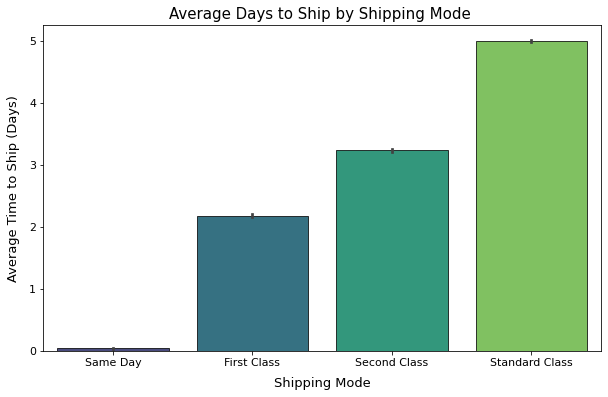

In [51]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Ship Mode', y = 'time_to_ship', data = orders_df, order = ['Same Day', 'First Class', 'Second Class', 'Standard Class'], linewidth = 0.75, ec = 'black', palette = 'viridis')
plt.xlabel('Shipping Mode', fontdict = {'fontsize':13}, labelpad = 9)
plt.ylabel('Average Time to Ship (Days)', fontdict = {'fontsize':13}, labelpad = 9)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.title('Average Days to Ship by Shipping Mode ', fontdict = {'fontsize': 15});

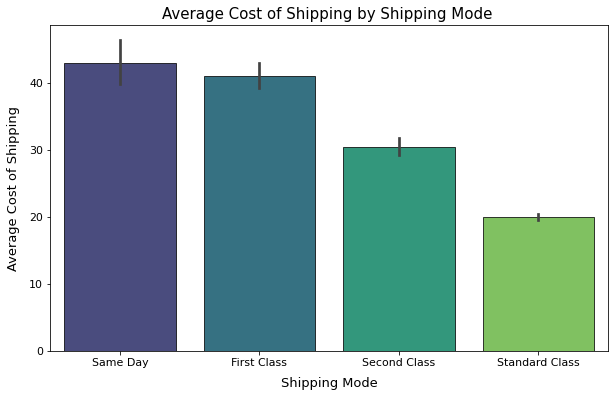

In [52]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Ship Mode', y = 'Shipping Cost', data = orders_df, order = ['Same Day', 'First Class', 'Second Class', 'Standard Class'], linewidth = 0.75, ec = 'black', palette = 'viridis')
plt.xlabel('Shipping Mode', fontdict = {'fontsize':13}, labelpad = 9)
plt.ylabel('Average Cost of Shipping', fontdict = {'fontsize':13}, labelpad = 9)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.title('Average Cost of Shipping by Shipping Mode ', fontdict = {'fontsize': 15});

In [13]:
orders_df[(orders_df['Ship Mode'] == 'Same Day') & (orders_df['time_to_ship'] != 0)]['Row ID'].count()

101

In [14]:
missed_same_day_df = orders_df[(orders_df['Ship Mode'] == 'Same Day') & (orders_df['time_to_ship'] != 0)]

### Question 2: Where do most orders come from?

In [56]:
orders_df['Market'].value_counts(normalize = True)

APAC      0.214506
LATAM     0.200702
EU        0.194970
US        0.194853
EMEA      0.098050
Africa    0.089433
Canada    0.007487
Name: Market, dtype: float64

#### Which countries are in APAC, LATAM, and EU?

In [60]:
def get_country_list(market):
    return orders_df[orders_df['Market'] == market]['Country'].unique()

In [61]:
get_country_list('APAC')

array(['Australia', 'New Zealand', 'Afghanistan', 'China', 'Taiwan',
       'India', 'Indonesia', 'Bangladesh', 'Philippines', 'Malaysia',
       'Thailand', 'Cambodia', 'Japan', 'Vietnam', 'Singapore',
       'Pakistan', 'Myanmar (Burma)', 'South Korea', 'Papua New Guinea',
       'Hong Kong', 'Nepal', 'Sri Lanka', 'Mongolia'], dtype=object)

In [62]:
get_country_list('LATAM')

array(['Brazil', 'Mexico', 'El Salvador', 'Dominican Republic', 'Uruguay',
       'Nicaragua', 'Colombia', 'Ecuador', 'Guatemala', 'Argentina',
       'Cuba', 'Jamaica', 'Honduras', 'Paraguay', 'Bolivia', 'Chile',
       'Martinique', 'Venezuela', 'Trinidad and Tobago', 'Panama',
       'Haiti', 'Barbados', 'Peru', 'Guadeloupe'], dtype=object)

In [63]:
get_country_list('EU')

array(['Germany', 'France', 'Italy', 'United Kingdom', 'Spain', 'Austria',
       'Netherlands', 'Belgium', 'Finland', 'Switzerland', 'Portugal',
       'Sweden', 'Norway', 'Ireland', 'Denmark'], dtype=object)

#### Which country places the most orders?

In [57]:
orders_df['Country'].value_counts(normalize = True)

United States    0.194853
Australia        0.055313
France           0.055118
Mexico           0.051550
Germany          0.040261
                   ...   
Bahrain          0.000039
Burundi          0.000039
Swaziland        0.000039
Chad             0.000039
Eritrea          0.000039
Name: Country, Length: 147, dtype: float64

### Which countries/markets account for highest sales/profit?

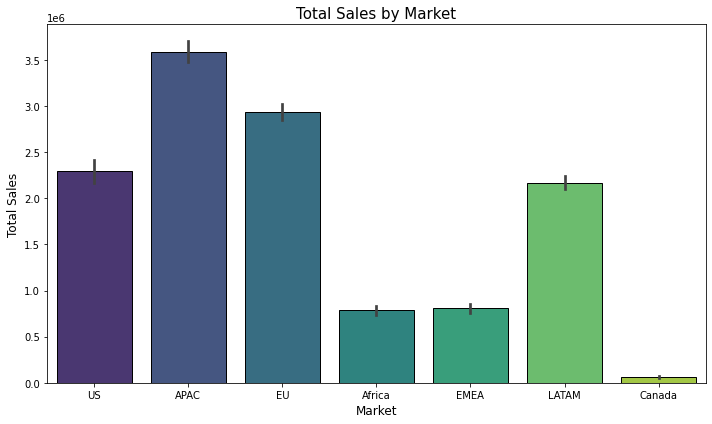

In [103]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Market', y = 'Sales', data = orders_df, palette = 'viridis', linewidth = 1, ec = 'black', estimator = sum)
plt.title('Total Sales by Market', fontdict = {'fontsize': 15})
plt.xlabel('Market', fontdict = {'fontsize': 12})
plt.ylabel('Total Sales', fontdict = {'fontsize': 12})
plt.tight_layout();

Text(0.5, 0, 'Country')

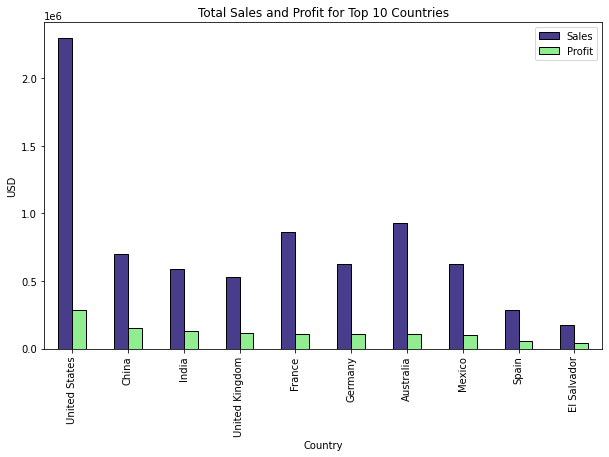

In [137]:
orders_df.groupby('Country')[['Sales', 'Profit']].sum().sort_values(by = 'Profit', ascending = False)[:10].plot(kind = 'bar', 
                                                                                                                figsize = (10,6), 
                                                                                                                color = ['darkslateblue', 'lightgreen'], 
                                                                                                                linewidth = 1, 
                                                                                                                ec = 'black',
                                                                                                                title = 'Total Sales and Profit for Top 10 Countries')
plt.ylabel('USD')
plt.xlabel('Country')

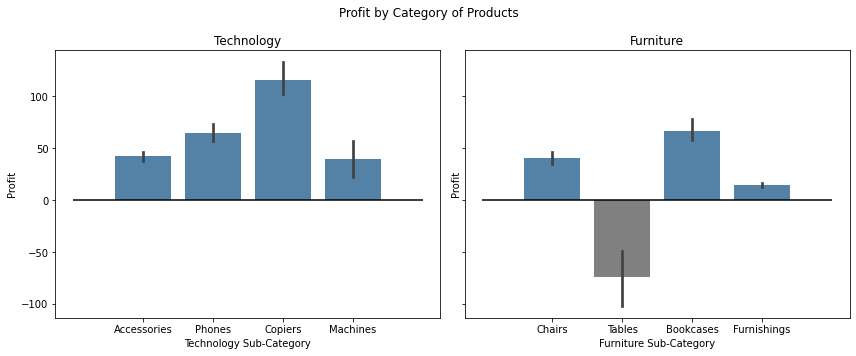

In [23]:
tech = orders_df[orders_df['Category'] == 'Technology']
furniture = orders_df[orders_df['Category'] == 'Furniture']
office_supplies = orders_df[orders_df['Category'] == 'Office Supplies']

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), sharey = True)

ax1 = axes[0]
ax2 = axes[1]
 

sns.barplot(x = 'Sub-Category', y = 'Profit', data = tech, ax = ax1, palette = (tech.groupby('Sub-Category')['Profit'].mean() > 0).map({True: 'steelblue', False: 'gray'}))
ax1.hlines(y = 0, xmin = -1, xmax = 4, color = 'black')
ax1.set_title('Technology')
ax1.set_xlabel('Technology Sub-Category')
sns.barplot(x = 'Sub-Category', y = 'Profit', data = furniture, ax = ax2, palette = ['steelblue', 'gray', 'steelblue', 'steelblue'])
ax2.hlines(y = 0, xmin = -1, xmax = 4, color = 'black')
ax2.set_title('Furniture')
ax2.set_xlabel('Furniture Sub-Category')
#sns.barplot(x = 'Sub-Category', y = 'Profit', data = office_supplies)

plt.suptitle('Profit by Category of Products')
plt.tight_layout();

In [24]:
tech.groupby('Sub-Category')['Profit'].sum()

Sub-Category
Accessories    129626.30620
Copiers        258567.54818
Machines        58867.87300
Phones         216717.00580
Name: Profit, dtype: float64

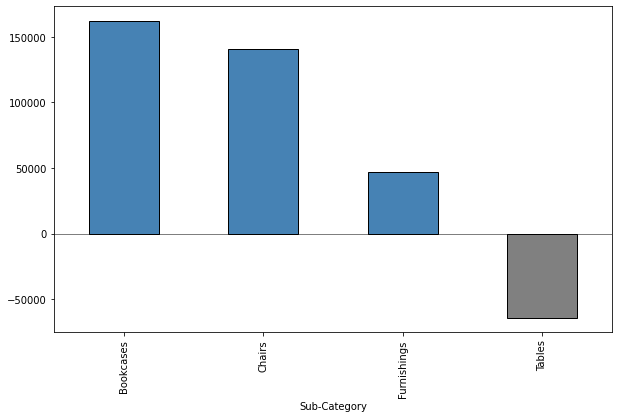

In [25]:
plt.figure(figsize = (10, 6))
furniture.groupby('Sub-Category')['Profit'].sum().plot(kind = 'bar', color = (furniture.groupby('Sub-Category')['Profit'].sum() > 0).map({True: 'steelblue', False: 'gray'}), ec = 'black')
plt.hlines(y = 0, xmin = -.5, xmax = 3.5, color = 'black', linewidth = 0.5)

In [26]:
np.mean(orders_df['Profit']/orders_df['Sales'])

0.047429599393209725